In [1]:
import psycopg2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
import os
import json
import time
import pickle
import requests

conn = psycopg2.connect( 
                        host = 'project.cgxhdwn5zb5t.us-east-1.rds.amazonaws.com',
                        port = 5432, 
                        user = 'postgres',
                        password = 'Admin123',
                        database = 'postgres')
cursor = conn.cursor()

In [2]:
DEC2FLOAT = psycopg2.extensions.new_type(
    psycopg2.extensions.DECIMAL.values,
    'DEC2FLOAT',
    lambda value, curs: float(value) if value is not None else None)
psycopg2.extensions.register_type(DEC2FLOAT)

In [3]:
cursor.execute('SELECT * FROM household_181')
rows = cursor.fetchall()
col_names = []
for elt in cursor.description:
    col_names.append(elt[0])

household_181 = pd.DataFrame(data=rows, columns=col_names )

In [4]:
household_181.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136245 entries, 0 to 136244
Columns: 182 entries, control to year
dtypes: float64(181), object(1)
memory usage: 189.2+ MB


In [5]:
household_181.dtypes

control      float64
omb13cbsa    float64
division     float64
intstatus    float64
intmonth     float64
              ...   
rmhome       float64
rmcosts      float64
rmhood       float64
rmother      float64
year          object
Length: 182, dtype: object

In [6]:
household_181.describe()

,control,omb13cbsa,division,intstatus,intmonth,intlang,intmode,permnear,vacresdays,vacrntdays,...,movforce,rmjob,rmownhh,rmfamily,rmchange,rmcommute,rmhome,rmcosts,rmhood,rmother
count,1.362450e+05,136245.000000,136245.000000,136245.000000,136245.000000,136245.000000,136245.000000,136245.000000,136245.000000,136245.000000,...,136245.000000,136245.000000,136245.000000,136245.000000,136245.000000,136245.000000,136245.000000,136245.000000,136245.000000,136245.000000
mean,1.104325e+07,62040.862857,5.478014,1.245829,7.039422,0.586686,1.165973,-5.759257,-5.748776,-5.775280,...,-4.383104,-4.514646,-4.547917,-4.529216,-4.515535,-4.509597,-4.554347,-4.524151,-4.551088,-4.524247
std,2.483225e+04,35455.723682,2.556581,0.645094,1.409371,2.328762,2.370249,1.421780,1.559736,1.386489,...,3.260303,3.139458,3.076451,3.112814,3.139171,3.150524,3.064042,3.124800,3.074021,3.123453
min,1.100000e+07,12060.000000,1.000000,1.000000,4.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,...,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.102171e+07,31080.000000,3.000000,1.000000,6.000000,1.000000,1.000000,-6.000000,-6.000000,-6.000000,...,-6.000000,-6.000000,-6.000000,-6.000000,-6.000000,-6.000000,-6.000000,-6.000000,-6.000000,-6.000000
50%,1.104339e+07,42660.000000,5.000000,1.000000,7.000000,1.000000,2.000000,-6.000000,-6.000000,-6.000000,...,-6.000000,-6.000000,-6.000000,-6.000000,-6.000000,-6.000000,-6.000000,-6.000000,-6.000000,-6.000000
75%,1.106477e+07,99998.000000,8.000000,1.000000,8.000000,1.000000,2.000000,-6.000000,-6.000000,-6.000000,...,-6.000000,-6.000000,-6.000000,-6.000000,-6.000000,-6.000000,-6.000000,-6.000000,-6.000000,-6.000000
max,1.108703e+07,99999.000000,9.000000,3.000000,10.000000,10.000000,2.000000,2.000000,3.000000,3.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [7]:
#find the index of target column
household_181.columns.get_loc("ratingnh")

155

In [8]:
#drop the target column
df = household_181.drop(columns=['ratingnh'])

In [9]:
#total column should be 180 since we drop target column
df.describe()

,control,omb13cbsa,division,intstatus,intmonth,intlang,intmode,permnear,vacresdays,vacrntdays,...,movforce,rmjob,rmownhh,rmfamily,rmchange,rmcommute,rmhome,rmcosts,rmhood,rmother
count,1.362450e+05,136245.000000,136245.000000,136245.000000,136245.000000,136245.000000,136245.000000,136245.000000,136245.000000,136245.000000,...,136245.000000,136245.000000,136245.000000,136245.000000,136245.000000,136245.000000,136245.000000,136245.000000,136245.000000,136245.000000
mean,1.104325e+07,62040.862857,5.478014,1.245829,7.039422,0.586686,1.165973,-5.759257,-5.748776,-5.775280,...,-4.383104,-4.514646,-4.547917,-4.529216,-4.515535,-4.509597,-4.554347,-4.524151,-4.551088,-4.524247
std,2.483225e+04,35455.723682,2.556581,0.645094,1.409371,2.328762,2.370249,1.421780,1.559736,1.386489,...,3.260303,3.139458,3.076451,3.112814,3.139171,3.150524,3.064042,3.124800,3.074021,3.123453
min,1.100000e+07,12060.000000,1.000000,1.000000,4.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,...,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.102171e+07,31080.000000,3.000000,1.000000,6.000000,1.000000,1.000000,-6.000000,-6.000000,-6.000000,...,-6.000000,-6.000000,-6.000000,-6.000000,-6.000000,-6.000000,-6.000000,-6.000000,-6.000000,-6.000000
50%,1.104339e+07,42660.000000,5.000000,1.000000,7.000000,1.000000,2.000000,-6.000000,-6.000000,-6.000000,...,-6.000000,-6.000000,-6.000000,-6.000000,-6.000000,-6.000000,-6.000000,-6.000000,-6.000000,-6.000000
75%,1.106477e+07,99998.000000,8.000000,1.000000,8.000000,1.000000,2.000000,-6.000000,-6.000000,-6.000000,...,-6.000000,-6.000000,-6.000000,-6.000000,-6.000000,-6.000000,-6.000000,-6.000000,-6.000000,-6.000000
max,1.108703e+07,99999.000000,9.000000,3.000000,10.000000,10.000000,2.000000,2.000000,3.000000,3.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [10]:
from sklearn.preprocessing import LabelEncoder

# Extract our X and y data
#X = df.iloc[:,0:50]
X = df
y = household_181["ratingnh"]


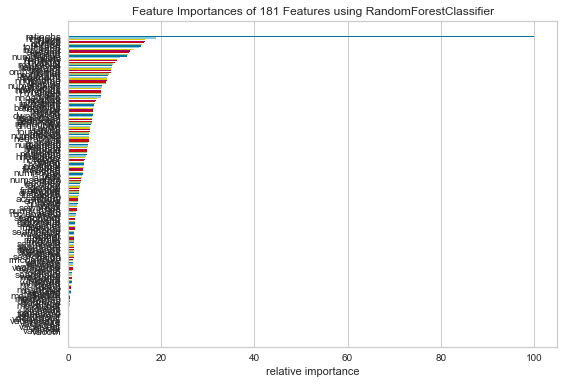

In [11]:
#identify the feature importance
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.model_selection import FeatureImportances

model = RandomForestClassifier(n_estimators=100)
viz = FeatureImportances(model)
viz.fit(X, y)
viz.show()

In [12]:
# Create a dictionary that will map the feature name with its feature importance
feats = {}

# Loop through Feature
for feature, importance in zip(X.columns, model.feature_importances_):
    feats[feature] = importance # Add the name/value pair

# View our dictionary, but sorted in order of importance
sorted(feats.items(), key=lambda x: x[1], reverse=True)

[('ratinghs', 0.1218330388563761),
 ('hhmove', 0.022964751719071884),
 ('hhage', 0.020200522899205386),
 ('hincp', 0.020182149174927885),
 ('control', 0.019775579619412852),
 ('hhrace', 0.01923295474158777),
 ('tothcamt', 0.01915513539854692),
 ('fincp', 0.018428813509241488),
 ('insuramt', 0.017316270142690358),
 ('elecamt', 0.01609326518987207),
 ('utilamt', 0.0159293441135896),
 ('hhgrad', 0.01565852609962124),
 ('numpeople', 0.015285157452228025),
 ('numvets', 0.013573742223856917),
 ('hhnatvty', 0.012920213107507725),
 ('hhcitshp', 0.012781115638241414),
 ('yrbuilt', 0.012270591269729968),
 ('marketval', 0.011687289562246761),
 ('hshldtype', 0.011609173143916587),
 ('wateramt', 0.0114938859480846),
 ('gasamt', 0.011296516449502055),
 ('omb13cbsa', 0.01119610973956891),
 ('hhmar', 0.011147390755305015),
 ('protaxamt', 0.010586430032963317),
 ('maintamt', 0.010328512269688584),
 ('trashamt', 0.010291495259918553),
 ('intmonth', 0.010287770047041955),
 ('nhqpcrime', 0.010217953555756

In [14]:
# We will pick top 50 features to be our important features

features = sorted(feats.items(), key=lambda x: x[1], reverse=True)[:50]
imp_features=[]
for f in features:
    imp_features.append(f[0])
#imp_features = tuple(imp_features)

In [15]:
LABEL_MAP = {
    -6: "Not Happy",
    -9: "Not Happy",
    1: "Not Happy",
    2: "Not Happy",
    3: "Not Happy",
    4: "Not Happy",
    5: "Not Happy",
    6: "Not Happy",
    7: "Happy",
    8: "Happy",
    9: "Happy",
    10: "Happy"
}

In [16]:
# Convert class labels into text
household_181["ratingnh"] = household_181["ratingnh"].map(LABEL_MAP)

In [17]:
from sklearn.preprocessing import LabelEncoder

# Extract our X and y data
X = df[imp_features]
y = household_181["ratingnh"]

# Encode our target variable
encoder = LabelEncoder().fit(y)
y = encoder.transform(y)
print(X.shape, y.shape)

(136245, 50) (136245,)


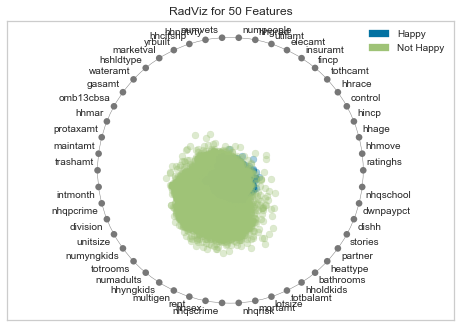

In [19]:
from yellowbrick.features import RadViz

_ = RadViz(classes=encoder.classes_, alpha=0.35).fit_transform_show(X, y)

## Regression

In [21]:
from sklearn import metrics
from sklearn.model_selection import KFold

from sklearn.linear_model import SGDClassifier
from sklearn import linear_model

In [22]:
def get_internal_params(model):
    for attr in dir(model):
        if attr.endswith("_") and not attr.startswith("_"):
            print(attr, getattr(model, attr))

In [26]:
#Perform SGD Classifier

model = SGDClassifier(loss="hinge", penalty="l2", max_iter=100)
model.fit(X,y)
get_internal_params(model)

classes_ [0 1]
coef_ [[-1.55269080e+04 -1.37954281e+06 -4.76631880e+04 -1.94625370e+05
   2.49317841e+02 -5.00443984e+03 -6.78896412e+05 -2.51205110e+05
  -4.21734191e+04 -7.18335600e+04 -1.23955852e+05 -3.17361544e+04
  -5.37547873e+03 -4.24365816e+03 -7.51698540e+04 -5.31961655e+03
  -3.22318397e+03  1.43999005e+04 -6.61608723e+03 -1.69236158e+04
  -2.54770023e+04  1.02241364e+04 -6.29958066e+03 -8.77212644e+04
  -2.58624450e+05 -1.20909832e+04  2.90774672e+02 -5.43750141e+03
   2.56252633e+02 -3.55394690e+02 -4.16497260e+03 -3.68973643e+02
  -5.19755643e+03 -4.15939702e+03 -5.00371473e+03  4.44018850e+04
  -5.20586879e+03 -5.44709225e+03 -5.00790613e+03 -1.14154533e+05
  -8.00546094e+02 -1.13433232e+05 -4.24199583e+03 -1.28431260e+02
   2.74804614e+02 -4.22085973e+03  8.20028683e+01 -6.88956272e+03
  -3.15993711e+03 -4.58964769e+03]]
intercept_ [2.85452929]
loss_function_ <sklearn.linear_model.sgd_fast.Hinge object at 0x1a56c9d7b0>
n_iter_ 100
t_ 13624501.0


/Users/sabashaikh/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [27]:
# Perform  Lasso Classifier Classification

model = linear_model.Ridge(alpha=1)
model.fit(X,y)
get_internal_params(model)

coef_ [-6.18860520e-02 -2.18215254e-05 -5.24266559e-04 -9.39606792e-08
 -1.28099904e-07  5.98477296e-03 -7.42325817e-06  5.10402803e-08
 -9.23462641e-06 -1.78961901e-05 -8.03242704e-05 -6.02452259e-03
  2.10257408e-03  6.51043203e-03 -9.55196860e-06 -6.63978328e-03
 -3.50834877e-04 -5.85443565e-09 -5.08423843e-03  1.25065459e-04
 -3.80638995e-06 -5.83125209e-09  7.66098783e-03 -1.99362249e-06
  4.30843410e-06  1.37685593e-04 -2.79807138e-03 -7.34818253e-03
  2.16074740e-03 -1.24243483e-03  1.86885588e-02 -2.84436756e-04
  1.12904392e-03 -1.08662026e-02 -2.23129467e-03 -1.00080422e-05
  2.09545816e-02 -4.33708713e-03  1.03036606e-02  6.56018865e-06
 -2.92410861e-03 -3.55380652e-08  4.34643614e-03 -3.48712057e-03
  4.19843744e-04 -2.10914971e-03 -1.36749438e-03  1.76233037e-02
 -6.08996452e-04 -9.79967144e-05]
intercept_ 3.058100282912161
n_iter_ None
